# Matplotlib - Intro

* **matplotlib** is a Python plotting library for producing publication quality figures
    * allows for interactive, cross-platform control of plots
    * makes it easy to produce static raster or vector graphics
        * gives the developer complete control over the appearance of their plots, while still being usable through a powerful defaults system
* standard scientific plotting library
* online documentnation is on [matplotlib.org](https://matplotlib.org/index.html), with lots of examples in the [gallery](https://matplotlib.org/gallery.html)

* behaves similarly to Matlab

In [1]:
import matplotlib.pyplot as plt
import numpy as np

To be efficient with **matplotlib**, you first need to understand its terminology.

## Parts of a Figure

<img src="../figures/matplotlib_figure_parts.png" style="height:90%; width:90%;">

### Figure, Axes, Axis

* **Figure** is the whole image, the top-level 'container' that holds all objects of an image.
* **Axes** is the region of a **Figure** that displays your data. Most plotting occurs here! Very similar to a subplot
* **Axes** contains **Axis** objects (x axis,y axis) which control the data limits.
* **Figure** can have any number of **Axes**, but to be useful should have at least one.

In [2]:
fig = plt.figure() # Create a figure
# axes = fig.add_subplot(111) # add one Axes to Figure

<Figure size 432x288 with 0 Axes>

Usually an **Axes** is set up with a call to `fig.add_subplot()`, `plt.subplot()`, or `plt.subplots()` 

The most flexible option is `plt.subplots()`

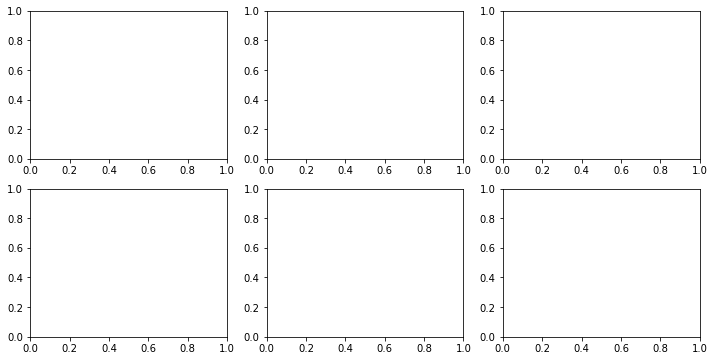

In [3]:
fig,axes = plt.subplots(2, 3, figsize=(12,6))
# This will create a figure and 6 axes arranged in 2 rows, 3 columns

---

## Line plots

Lets draw two cosine functions of different amplitude on the same **Axes**.

In [4]:
# Create data
X = np.linspace(-np.pi, np.pi, 100, endpoint=True) # NB. endpoint=True is default option
Y1 = np.cos(X)
Y2 = 2*np.cos(X)

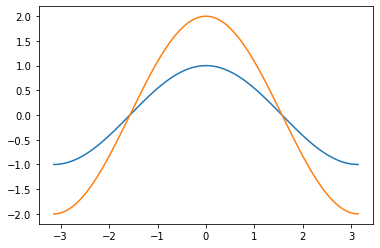

In [5]:
# Plot data
fig, axes = plt.subplots() # calling subplots without any arguments creates a one axes by default
axes.plot(X, Y1)
axes.plot(X, Y2);

** Tip: by adding a semicolon at the end of a function, the output is suppressed.

### Default and named colors

![](../figures/dflt_style_changes-1.png)

**Exercise 0 (10 mins)**. The figure before is generated using the default settings. The code below shows these settings explicitly. Play with the values to explore their effect. For details on changing properties see [line plots on the matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

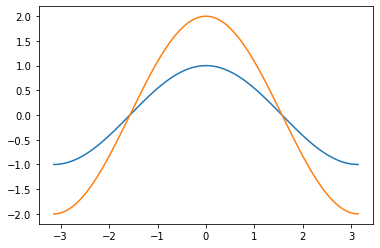

In [6]:
# Plot data (with explicit plotting settings)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
axes.plot(X, Y1, color='C0', linewidth=1.5, linestyle='-',alpha=1.)
axes.plot(X, Y2, color='C1', linewidth=1.5, linestyle='-',alpha=1.);

In [7]:
# Your code here

**Exercise 1 (10 mins)**. Having integer numbers on the x axis here might divert reader's attention from the critical points of the graph.

1. Change **xticks** and **xticklabels** into multiples of $\pi$. Use `axes.set_xticks()` and `axes.set_xticklabels()`.

\*\* Tip: use `np.pi` for **xticks** and '\$\pi$' for **xticklabels**. format strings in LaTeX by prepending 'r'ie `axes.set_xticklabels([r'$\pi$'])`

In [8]:
# Youd code here

**Exersise 2 (5 mins)**. Add a legend.
1. Give both cosine functions a name by adding an extra keyword argument, a label, to `axes.plot()`.
2. Add a legend object to **Axes**.

In [9]:
# Your code here

**Exercise 3 (10 mins)**. Annotate an interesting point on a graph, for example, $2\cos(\frac{\pi}{4})$.
1. Add a single point to the graph by using `axes.plot(..., marker='o')`.
2. Use `axes.annotate(s, xy=..., xytext=...)` to add annotation.

** Tip: visit [annotations](https://matplotlib.org/users/annotations_intro.html).

In [10]:
# Your code here

---

## Bar plots

Bar plots are created in much the same way as line plots, with two arrays of equal size.

Here we use `bar()` to plot the data on North Atlantic oscillation from the NWS Climate Prediction Center. 

Data source: http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml

Variable: **monthly mean** NAO index since January 1950 til March 2019.

Data stored in text file in the following way:

Year | Month | Value

1950 1 0.92000E+00

### Read NAO data from a text file

The simplest way to load data from a text file in `numpy` is to use `np.loadtxt()` function. 

In [11]:
#np.loadtxt() # To see options, hit Shift+Tab+Tab within the brackets

This function has a lot parameters that you can adjuct to fit  your data format. Here we use only:

`np.loadtxt(fname, skiprows=..., usecols=..., unpack=...)`

In [12]:
nao_yr, nao_mn, nao_val = np.loadtxt('../data/nao_monthly.txt', unpack=True) # read year, month, values

In [48]:
print(nao_val)

[ 0.92       0.4       -0.36       0.73      -0.59      -0.06
 -1.26      -0.05       0.25       0.85      -1.26      -1.02
  0.08       0.7       -1.02      -0.22      -0.59      -1.64
  1.37      -0.22      -1.36       1.87      -0.39       1.32
  0.93      -0.83      -1.49       1.01      -1.12      -0.4
 -0.09      -0.28      -0.54      -0.73      -1.13      -0.43
  0.33      -0.49      -0.04      -1.67      -0.66       1.09
  0.4       -0.71      -0.35       1.32       1.04      -0.47
  0.37       0.74      -0.83       1.34      -0.09      -0.25
 -0.6       -1.9       -0.44       0.6        0.4        0.69
 -1.84      -1.12      -0.53      -0.42      -0.34      -1.1
  1.76       1.07       0.32      -1.47      -1.29       0.17
 -0.22      -1.12      -0.05      -1.06       2.21       0.1
 -0.75      -1.37       0.24       0.88       0.51       0.1
  1.05       0.11      -1.26       0.49      -0.79      -0.72
 -1.19      -0.55      -1.66       1.32       0.73       0.12
 -0.54      

In [49]:
np.get_printoptions()['threshold']

1000

`unpack = True` allows us to assign a different variable for each column. 

NB. Alternative ways to load/read text files will be covered in the pandas section later...

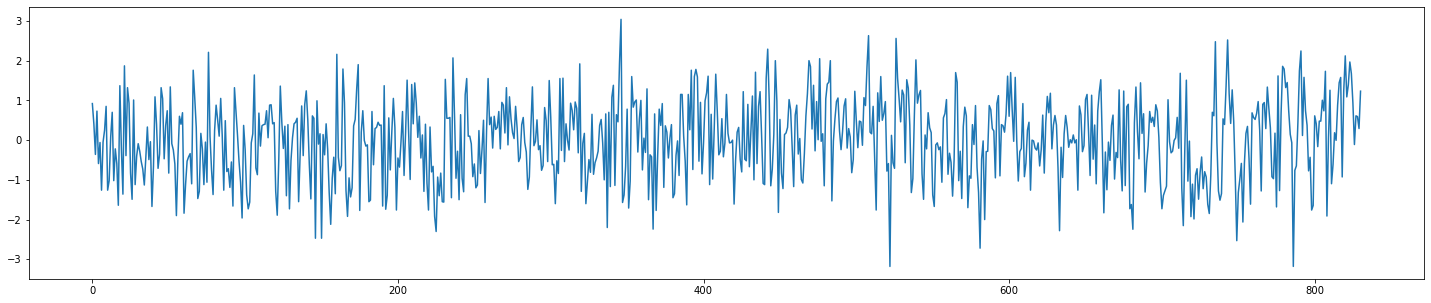

In [13]:
# Quick look at the NAO values
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(nao_val);

Let's focus on the last 5 years and slice the `nao_val` array accordingly.

In [14]:
# Slicing
nao_val_sub = nao_val[-12*5:] # extract last 12 months * 5 years

In [15]:
# Create an array of month numbers
nao_time = np.arange(len(nao_val_sub))
nao_time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

NB. More on how to create actual date labels later... 

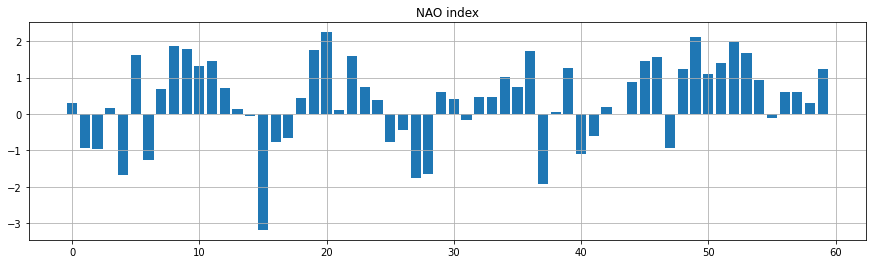

In [16]:
# Plot bar
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(nao_time,nao_val_sub) # NB. different to plot() in that time/position variable is needed. 
ax.set_title('NAO index')
ax.grid(True)

---

## Scatter plots

* Display data as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis
  * Useful for non-gridded or irregularly sampled data

* Option to colorcode or size the data points to display an additional variable

`scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, edgecolors=None, **kwargs)`

In [17]:
# Generate some data (circles of random diameter)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi*(15*np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)

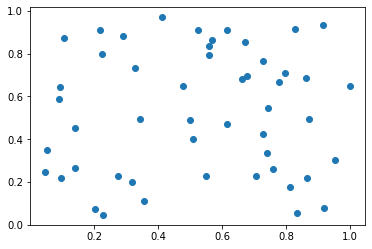

In [18]:
# Plot simple scatter
plt.scatter(x, y);

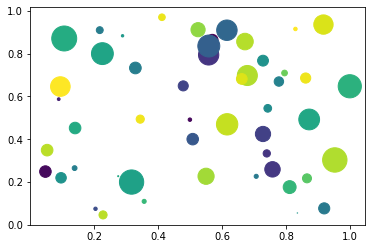

In [19]:
# scatter showing different area and color
plt.scatter(x, y, s=area, c=colors);

---

## Multiple subplots

`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

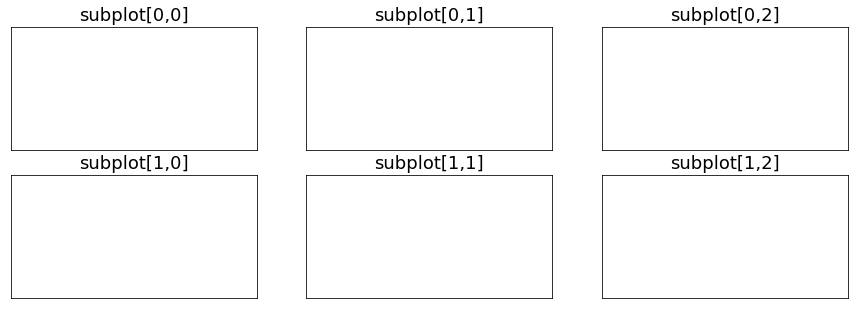

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5)) # or plt.subplots(2,3,figsize=(15,5))
axes[0,0].set_title('subplot[0,0]', fontsize=18);
axes[0,1].set_title('subplot[0,1]', fontsize=18);
axes[0,2].set_title('subplot[0,2]', fontsize=18);
axes[1,0].set_title('subplot[1,0]', fontsize=18);
axes[1,1].set_title('subplot[1,1]', fontsize=18);
axes[1,2].set_title('subplot[1,2]', fontsize=18);

for ax in axes.flat: # you can loop over axes
    ax.set_xticks([]);
    ax.set_yticks([]);

### Subplots with real data

To practice our plotting we are going to work with data from the NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network.

Source: https://www.esrl.noaa.gov/gmd/dv/data/

Monthly averages of atmospheric carbon dioxide ($CO_2$) and methane ($CH_4$) 

Stations: 
* CGO = Cape Grim, Tasmania, Australia
* MHD = Mace Head, County Galway, Ireland

Units:
* $CO_2$ - ppm
* $CH_4$ - ppb

Data stored in a text file. The top row states the number of header lines in the file. No title headers. The actual data is ogranized as following:

|Station code | Year | Month | Measurement|
| :------------- | :----------: | :----------|  :---------- |
|CGO       |     1984   |  4  |     341.63  |

#### Read data from a text file

In [21]:
data = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3))
data

array([[1984.  ,    4.  ,  341.64],
       [1984.  ,    5.  ,  341.73],
       [1984.  ,    6.  ,  342.  ],
       ...,
       [2018.  ,   10.  ,  406.11],
       [2018.  ,   11.  ,  405.84],
       [2018.  ,   12.  ,  405.59]])

If we want to have three separate arrays for year, month and value, we can set `unpack=True` and store the output from `np.loadtxt()` function in three separate arrays.

In [22]:
year, month, value = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3), unpack=True)

#### Kwargs

* remember from earlier, you can store any number of keyword arguments in a dictionary, and later unpack it when calling a function

In [23]:
# Kwargs
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

In [24]:
# Read data
# CO2 
cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt('../data/co2_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt('../data/ch4_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt('../data/ch4_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)


We'll find out how to properly plot on a time axis soon! For now, create dummy time arrays by some arithmetic to numpy arrays.

In [25]:
cgo_co2_time_dummy = cgo_co2_yr*12 + cgo_co2_mn
mhd_co2_time_dummy = mhd_co2_yr*12 + mhd_co2_mn
cgo_ch4_time_dummy = cgo_ch4_yr*12 + cgo_ch4_mn
mhd_ch4_time_dummy = mhd_ch4_yr*12 + mhd_ch4_mn

**Exercise 4a (20 mins)**. Construct two subplots using the arrays created above. One for $CO_2$, one for $CH_4$. Add titles, x and y labels, legend. If you have time left, play with optional arguments of `plot()`. 

The desired outcome is something like this (time on x axis will follow in part b):

<img src="../figures/subplots_example.png">

In [26]:
# Your code here

**Hint:** You can run the following cell for a partial solution to start from: 

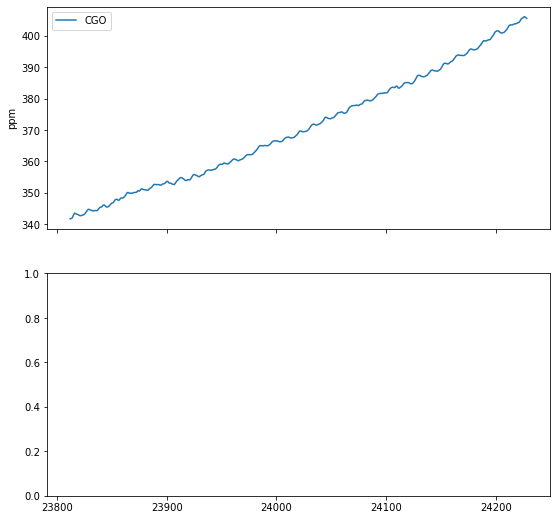

In [27]:
# create the figure and desired subplot axes arrangement:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9,9), sharex=True)

# plot data on the first subplot:
axes[0].plot(cgo_co2_time_dummy, cgo_co2_val, label='CGO')

# add a label for the Y axis:
axes[0].set_ylabel('ppm')

# add a legend (this uses the "label" specified when plotting)
axes[0].legend();

#### Datetime

* `datetime` module helps to work with time arrays

In [28]:
from datetime import datetime

In [29]:
datetime.now()

datetime.datetime(2022, 4, 29, 10, 5, 14, 987856)

In [30]:
a_date = datetime(2019, 5, 23)
a_date

datetime.datetime(2019, 5, 23, 0, 0)

In [31]:
python_course_dates = [datetime(2021, 6, i) for i in [7,8,9,10,11]]
python_course_dates

[datetime.datetime(2021, 6, 7, 0, 0),
 datetime.datetime(2021, 6, 8, 0, 0),
 datetime.datetime(2021, 6, 9, 0, 0),
 datetime.datetime(2021, 6, 10, 0, 0),
 datetime.datetime(2021, 6, 11, 0, 0)]

**More on datetime in notebook 16**

Let's apply it to our year and month arrays.

In [32]:
# Using list comprehension
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]

In [33]:
# Same as in previous cell but using a for loop
cgo_co2_time = []
for i, j in zip(cgo_co2_yr, cgo_co2_mn):
    cgo_co2_time.append(datetime(int(i), int(j), 1))

In [34]:
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]

cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]

<b>Exercise 4b (5 min).</b> Improve your solution to exercise 4a by using the newly constructed datetime lists. Note how matplotlib understands the datetime format!

In [35]:
# your code here

---
---

## Plotting 2D data: contour (and contourf) plots

In [50]:
import matplotlib.pyplot as plt
import numpy as np

* `contour()` and `contourf()` draw contour lines and filled contours, respectively
* good for 2D gridded data

** Note: `contourf()` differs from the Matlab version in that it does not draw the polygon edges. To draw edges, add line contours with calls to `contour()`.

`contour(Z)` - make a contour plot of an array Z. The level values are chosen automatically, axes will refer to indices in the array.

`contour(X, Y, Z)` - X, Y specify the (x, y) coordinates of the surface

`contour(X, Y, Z, N)` - contour up to N automatically-chosen levels

`contour(X, Y, Z, [level1, level2])` - contour on specific levels, e.g. level1, level2. 

In [37]:
# Let's create a function to generate some data
def fun(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2) 

In [38]:
# Create a regular (x,y) grid
n = 200
x1d = np.linspace(-3,3,n)
y1d = np.linspace(-3,3,n)
X, Y = np.meshgrid(x1d, y1d) # repeat x y times and y x times

In [39]:
# Calculate the data
data = fun(X,Y)

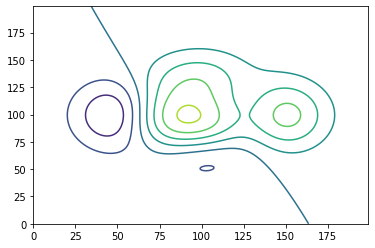

In [40]:
# A simple example first: 
plt.contour(data);
#plt.contour(X, Y, data);

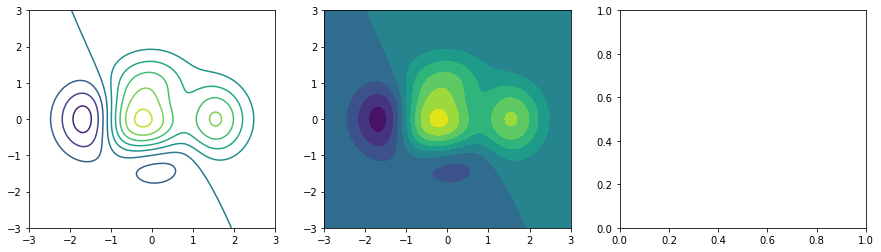

In [41]:
# Plot subplots using contour and contourf
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, data, 10);
ax2.contourf(X, Y, data, 10);
#ax3.contour(X, Y, data, 10, colors='k');
#ax3.contourf(X, Y, data, 10);

### How to add a colorbar?

When adding a **colorbar**, it needs to know the relevant *axes* and *mappable* content - especially when working with subplots or layered figures. 

Note that a colorbar will also have its own axes properties...  

We tell matplotlib which plotted values to use for the colorbar content with: `fig.colorbar(mappable, ax=ax_no)`

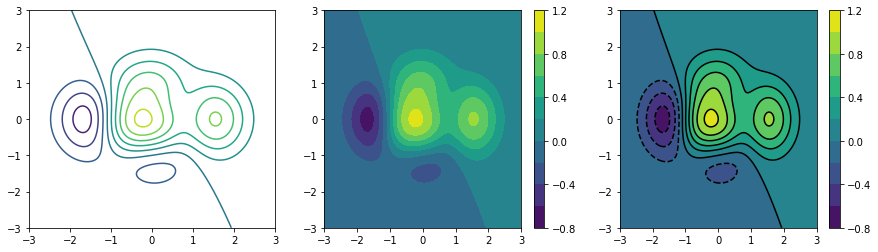

In [42]:
# Plot contour and contourf with colorbars
# By default matplotlib contours negative values with a dashed line. This behaviour can be changed with rcparams:
#plt.rcParams['contour.negative_linestyle']= 'solid' # Reset to default with `= 'dashed'`

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, data, 10)
mappable2 = ax2.contourf(X, Y, data, 10)
#mappable2.set_clim(0,1)

ax3.contour(X, Y, data, 10, colors='k')
mappable3 = ax3.contourf(X, Y, data, 10)

fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

#### Mini exercise: 10 min

Play around with the lines of code in the cell above, and see how the figure changes, e.g. 

* What happens if you try to add a colorbar to ax1? 

* Try plotting chosen contour levels for ax2 or ax3, and see what happens to the colorbar? 



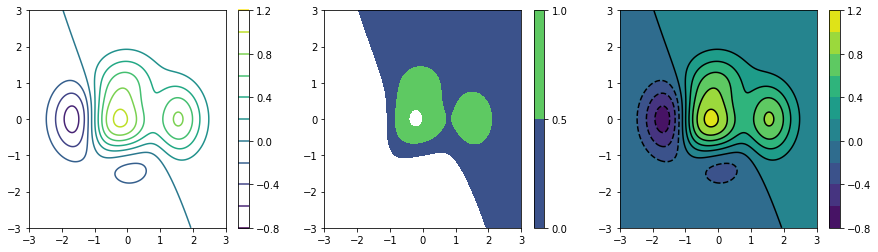

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
mappable1 = ax1.contour(X, Y, data, 10)
mappable2 = ax2.contourf(X, Y, data, [0,0.5,1])
#mappable2.set_clim(0,1)

ax3.contour(X, Y, data, 10, colors='k')
mappable3 = ax3.contourf(X, Y, data, 10)

fig.colorbar(mappable1, ax=ax1)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

---

### Aside: Choose your colormap wisely 

The "default" colormap in python is viridis. However, colormaps can (and should) be varied to suit the data being shown.  
For example, you would likely prefer a *sequential* scale for bathymetry, as opposed to a *diverging* scale for temperature anomalies? 

There is a large variety of maps to choose from in matplotlib, as shown [here](https://matplotlib.org/2.0.1/users/colormaps.html). 

<img src="../figures/colormaps_reference_00.png">  
<img src="../figures/colormaps_reference_03.png">

**Don't let a bad colormap mess with your science!** 

You should always choose ***perceptually uniform*** shading to ensure that data is not misrepresented.

**Jet has no place in the 21st century**. Also referred to as **rainbow**, it is an [awful colormap](http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/) that promotes [bad science](https://blogs.egu.eu/divisions/gd/2017/08/23/the-rainbow-colour-map/). 

There are many articles explaing the distortions created, and why you should therefore avoid using rainbow/jet e.g.    
* [The end of the rainbow](http://www.climate-lab-book.ac.uk/2014/end-of-the-rainbow/)
* [A dangerous rainbow: Why colormaps matter](https://blogs.mathworks.com/headlines/2018/10/10/a-dangerous-rainbow-why-colormaps-matter/)
* [Colour maps for Fisheries/Echosounders](https://academic.oup.com/icesjms/article/77/2/826/5684813). 

Matplotlib comes with great perceptually uniform default colormaps (as shown above). However, if they're not quite what you want, there are many others out there to check out, e.g. these custom colormaps crafted for [oceanography](https://matplotlib.org/cmocean/) and [general scientific visualisation/geophysics](http://www.fabiocrameri.ch/colourmaps.php). 

To make sure everyone can appreciate your beautiful figures, you could also use a colour blindness simulator, such as [this one](https://www.color-blindness.com/coblis-color-blindness-simulator/). 



---

## Other ways to plot 2D data?

In addition to contourf, you can also use `plt.pcolormesh`. 

This can be especially useful to plot gridded data "as is", without any smoothing or interpolation (although smoothing is an option for pcolormesh).  

The colour interval is set automatically based on the chosen colormap, no specification of contour levels.  

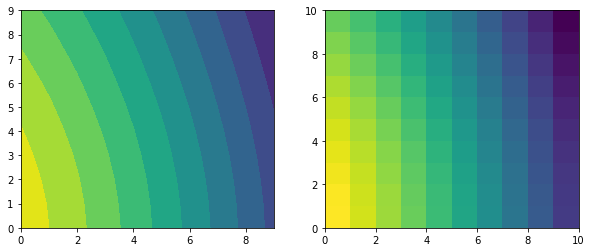

In [43]:
# Useful to sanity-check data, e.g.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.contourf(data[100:110,100:110], 10)
ax2.pcolormesh(data[100:110,100:110]);

---

## How to save a figure?

Matplotlib supports exporting to a large range of vector and raster image formats:

In [44]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)` to save your figure:

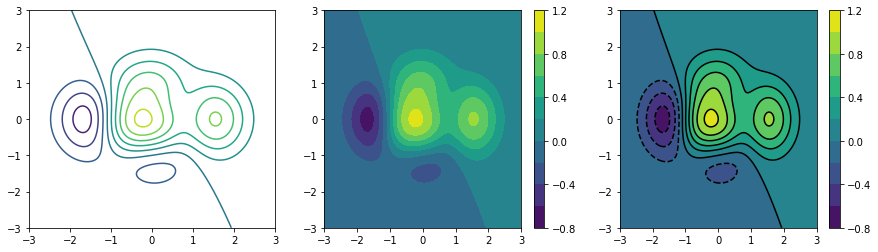

In [45]:
# Save contour and contourf with colorbars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, data, 10)
mappable2 = ax2.contourf(X, Y, data, 10)
mappable3 = ax3.contour(X, Y, data, 10, colors='k')
mappable3 = ax3.contourf(X, Y, data, 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

# fig.savefig('../figures/MY_AWESOME_FIGURE.png', dpi=300, facecolor='moccasin', bbox_inches='tight')

---
---

## Combined figures 

In this final example we demonstrate how you can produce a compact, combined figure: useful for data comparison or for journals with tight figure limits.

We'll make a "dummy" temperature cross-section, using meshgrid

In [57]:
dx = 0.025
x1d = np.sin(np.arange(np.pi / 4, 3 * np.pi / 4, dx))
y1d = 10**np.arange(0, 1, dx/10)-1
X2d, Y2d = np.meshgrid(x1d, y1d)

temp = X2d * Y2d

distance = np.linspace(0, 90, len(x1d))

depth = np.linspace(100, 1, len(y1d))

Present the data on a 2 X 2 set of axes, with a shared x axis and y axis. 

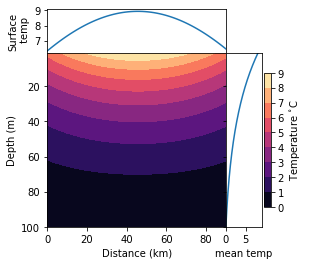

In [60]:
# == Increasing the font size to improve readability ==
plt.rcParams.update({"font.size": 10})

fig, axs = plt.subplots(2, 2, figsize=(4, 4), sharex="col", sharey="row",
                        gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
axs = axs.ravel()
# == Remove white space between subplots ==
fig.subplots_adjust(hspace=0, wspace=0)

axs[0].plot(distance, temp[-1, :])
# == Set colormap of choice ==
cb = axs[2].contourf(distance, depth, temp, 10, cmap='magma') 
axs[3].plot(np.nanmean(temp, 1), depth)

# == Add a colorbar to the right of the bottom right plot ==
fig.colorbar(ax=axs[3], mappable=cb, label=r"Temperature $\mathrm{^{\circ}C}$")

# == Remove the lines and ticks from the unused top right axis ==
axs[1].axis("off")

# == Addding labels and limits ==
axs[0].set(ylabel='Surface\n temp')
axs[2].set(
    xlim=[distance[0], distance[-1]],
    ylim=[depth[0], depth[-1]],
    ylabel="Depth (m)",
    xlabel="Distance (km)")
axs[3].set(xlim=[np.min(temp), np.max(temp)], xlabel="mean temp");

### This is a lot to remember though!

There are many options you can play around with, to improve presentation for your target audience or journal. 

Don't try to memorise everything - instead, you can always refer to: 
* [The documentation](https://matplotlib.org/stable/index.html) 
  * e.g. [Gallery for inspiration](https://matplotlib.org/stable/gallery/index.html)
* [matplotlib cheatsheets](https://github.com/matplotlib/cheatsheets)


## Final matplotlib exercise (20 mins)

Reproduce the figure below by using `contourf()` to show a map of sea surface temperature, and `plot()` for a zonally averaged temperature curve. 

The code for loading and processing the data is provided below, so you can focus on producing the figure...


![](../figures/matplotlib_map.png)

Data source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Dataset: AMSR-E Level 3 Sea Surface Temperature for Climate Model Comparison.

Variable: Sea Surface Temperature (K).

Time : 16-JUN-2002 00:00.

Spacial resolution: 1$^{\circ}$x1$^{\circ}$, 361 by 180 points (longitude by latitude).

Total Number of Records: 64980.

All the data processing is handled for you here, with the following steps: 
* Read the data using `np.genfromtxt` (very similar to `np.loadtxt`, but can handle missing values). 
* Reshape the 1D data into a 2D lat-lon grid. 
* Calculate the zonal-mean temperature. 

In [61]:
# Read modelling sst data
lon_raw, lat_raw, sst_raw = np.genfromtxt('../data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', 
                                          delimiter=',', skip_header=10, missing_values='-1.E+34', 
                                          usemask=True, usecols=(2, 3, 4), unpack=True)

# Reshape into a grid of sst with corresponding lat and lon coordinates
lon = np.unique(lon_raw)
lat = np.unique(lat_raw)
sst = np.reshape(sst_raw,(len(lat),len(lon)))

# Calculate the zonal-mean temperature here
temp_zonal_mean = np.nanmean(sst,1);

Now, plot the data...

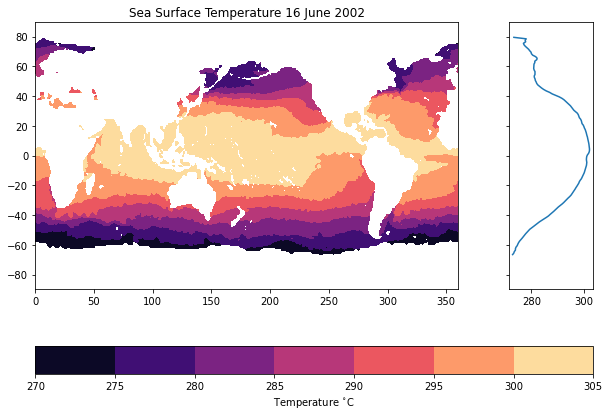

In [97]:
# Your code here
fig, axs = plt.subplots(1,2,figsize=(10,7),sharey=True,gridspec_kw={"width_ratios": [5, 1]})

#map1 = axs[0].pcolormesh(lon,lat,sst, cmap='magma')
map1 = axs[0].contourf(lon,lat,sst, cmap='magma')

axs[1].plot( np.nanmean(sst, 1), lat)

axs[0].set_title('Sea Surface Temperature 16 June 2002')

fig.colorbar(ax=axs, mappable=map1, label=r"Temperature $\mathrm{^{\circ}C}$", location='bottom')
#fig.colorbar(map1,ax=axs[0], location='left')

### Extension Exercise - Animation

You'll need to install ffmpeg for this (conda install -c conda-forge ffmpeg). You may need to restart your kernel if you've installed ffmpeg and your Jupyter kernel isn't picking it up.

Matplotlib has the ability to produce animations. The code below produces a nicely flowing pair of sin and cos graphs. Work through it, try and understand what's going on, then try:
- Changing the trig functions that are being plotted
- Changing amplitude/wavelength
- Animating points onto a scatterplot instead

In [ ]:
# import relevant modules for animation
from matplotlib import animation, rc
from IPython.display import HTML

# number of frames 
nframes = 200

# set up figure and axes
# in this case, plot 2 subplots in 2 rows and 1 column
fig, axes = plt.subplots(2,1, figsize=(7,5))

# customise element we want to animate
# in this case it is lines
line1, = axes[0].plot([], [], 'r', lw=2)
line2, = axes[1].plot([], [], 'b', lw=2)

# customise all axes
for ax in axes:
    ax.set_xlim(0,2)
    ax.set_ylim(-1.1,1.1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# customise individual axis
axes[0].set_title('y=sin(4πx)')
axes[1].set_title('y=cos(4πx)')
    
# make a list to store all elements we want to animate, to call them later
lines = [line1, line2]
    
# adjust space between graphs
plt.subplots_adjust(hspace=1)

# initialisation function plots the background for each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# animation function is called for in each frame to plot data
# call elements from list
def animate(i):
    
    x1 = np.linspace(0, 2*np.pi, nframes)
    y1 = np.sin(4*np.pi*(x1-(1/nframes)*i))
    lines[0].set_data(x1, y1)
    
    x2 = np.linspace(0, 2*np.pi, nframes)
    y2 = np.cos(4*np.pi*(x2-(1/nframes)*i))
    lines[1].set_data(x2, y2)
    
    return lines

# compile animation as 'anim'
# interval in milli-seconds
# blit=True only re-draws parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=20, blit=True)

In [ ]:
# display anim using HTML in IPython.display 
# matplotlib uses ffmpeg in the background to encode animation and render it as HTML5 video

HTML(anim.to_html5_video())

---------------------
### Bonus: styles with matplotlib

Matplotlib has a number of predefined styles that affect default colours, backgrounds, linewidths, font sizes etc.

You can display all available default styles with the following code

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)

You can use these styles individually, using the context manager `with plt.style.context('desired-style'):` then indenting your plotting code

In [ ]:
X = np.linspace(-np.pi, np.pi, 100, endpoint=True)
Y1 = np.cos(X)
Y2 = 2*np.cos(X)

In [ ]:
with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots()
    axes.plot(X, Y1, label='cos(x)');
    axes.plot(X, Y2, label='2cos(x)');

    axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]);
    axes.set_yticks([-2, -1, 0, 1, 2]);
    axes.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$']);
    axes.legend(loc='upper left', frameon=False);
    point = np.pi/4
    axes.plot(point, 2*np.cos(point), marker='o');
    axes.annotate(r'$2\cos(\frac{\pi}{4})=\sqrt{2}$', xy=(point, 2*np.cos(point)), xytext=(1, 1.5), fontsize=16);

One of these style is based on the inimitable xkcd comics 

In [ ]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

## References: 
General matplotlib
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
* https://matplotlib.org/gallery/showcase/xkcd.html#sphx-glr-gallery-showcase-xkcd-py


Colormaps 
* http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/
* https://blogs.egu.eu/divisions/gd/2017/08/23/the-rainbow-colour-map/
* www.fabiocrameri.ch/resources/PosterScientificColourMaps_Crameri.pdf) 
* https://academic.oup.com/icesjms/article/77/2/826/5684813
* cmocean colourmaps for Python (https://matplotlib.org/cmocean/) 
* cmcrameri colourmaps for Python https://github.com/callumrollo/cmcrameri